In [1]:
import os
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [2]:
DIR = "../../data/"
sub = "Subway USA/"

In [3]:
demographic = pd.read_csv(DIR + sub + "processed_demographic.csv")
stores = pd.read_csv(DIR + sub + "subway_usa_stores.csv", encoding='latin-1')
poi_variables = pd.read_csv(DIR + sub + "processed_poi.csv")
trade_area = pd.read_csv(DIR + sub + "processed_trade_area.csv")

to_remove = [col for col in trade_area.columns.tolist() if "_p_" in col]
trade_area = trade_area.drop(columns=to_remove)

merged = stores.merge(
    poi_variables, on="store"
).merge(
    demographic, on="store"
).merge(
    trade_area, on="store"
)

merged = merged.drop(columns=["store", "longitude", "latitude", "cbsa_name", "dma_name", "censusregion", "censusdivision"])
merged = merged.dropna()

In [4]:
ordinal_features_oth = [
    "market_size",
    "store_density",
]
ordering_ordinal_oth = [
    ["Very Large Metro (1)", "Large Metro (2)", "Large City (3)", "Medium City (4)", "Small City (5)", "Small Town (6)", "Small Community (7)", ""],
    ["Rural", "Exurban", "Suburban", "Light Suburban", "Light Urban", "Urban", "Super Urban"],
]
numeric_features = list(set(merged.select_dtypes(include=np.number).columns.tolist()))

numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
)

ordinal_transformer_oth = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(categories=ordering_ordinal_oth),
)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer_oth, ordinal_features_oth),
)

In [5]:
preprocessor.fit(merged)
transformed = preprocessor.transform(merged)

column_names = (
    numeric_features
    + preprocessor.named_transformers_['pipeline-2']['ordinalencoder'].get_feature_names_out().tolist()
)
len(column_names)

659

In [6]:
transformed_df = pd.DataFrame(transformed, columns=column_names)
transformed_df

,wealth_hhtotal_1mi,dtpop_students_post_secondary_p_2mi,emp_manfacturing_p_1mi,poverty_inpoverty_p_3mi,hu_renterocc_ta,hhinc30lt_p_3mi,com12pl_p_5mi,percapita_inc_1mi,disposable_inc_avg_2mi,pop_transient_ta,...,hh_type_male_nochild_p_2mi,emp_information_p_3mi,disposable_inc_avg_ta,occhu_5mi,inrix_ns_distance,hh_1pers_p_2mi,com0205_p_2mi,hh_4pers_p_2mi,x0,x1
0,-0.254873,0.622389,0.119907,-0.041396,0.036447,0.052513,-0.004962,0.619887,-0.160402,-0.204145,...,-0.992358,-0.432498,-0.248843,-0.306578,0.121060,1.204535,-0.272139,-0.734959,1.0,1.0
1,-0.005560,-0.662978,-0.458667,1.120837,-0.223047,1.216396,-2.028343,-0.052596,-1.063597,27.987186,...,1.966214,-0.613277,-0.896684,0.709359,-0.472252,1.563825,2.249158,-1.266207,1.0,4.0
2,0.423230,-0.685307,-0.791451,1.580324,0.587301,1.758648,-1.913273,-1.063988,-1.193694,0.317211,...,1.987448,0.190879,-1.360777,0.963131,-0.393081,1.113482,2.411852,-0.959926,1.0,4.0
3,-0.524453,2.964980,0.832423,0.553235,-0.572845,1.406081,0.016312,-0.109969,-0.387375,-0.185367,...,-0.956969,-0.987304,-1.070831,-0.550978,0.222063,0.490876,0.659487,-0.786458,5.0,0.0
4,-0.440576,-0.662978,-0.538756,-0.260470,-0.743384,1.913282,-0.027686,-0.473975,-1.268063,-0.142013,...,-0.511059,-1.230421,-1.252728,-0.578691,-0.350152,0.782492,-1.446442,-1.577908,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14377,0.074045,-0.558130,0.284227,-0.352937,0.200343,0.099934,-0.028652,-0.556342,-0.545361,-0.251365,...,0.586019,-0.420031,-0.598638,0.386149,0.151775,0.066372,-0.531176,-0.073610,0.0,3.0
14378,0.485131,-0.451339,0.052246,-0.673013,0.930352,-0.935087,-1.231077,0.693780,1.434622,0.882474,...,-0.723397,0.452697,1.509630,0.000006,0.182688,0.679134,0.557689,-0.249789,2.0,2.0
14379,-0.164524,0.203965,-0.697553,1.769525,-0.158381,1.708134,-0.969029,-0.977904,-1.273494,-0.116884,...,1.343357,0.084905,-1.129880,-0.005063,-0.512474,1.270979,1.294810,-1.222839,2.0,2.0
14380,-0.338750,-0.681424,-0.598132,0.685533,-0.156720,0.958671,1.064021,-0.980178,-1.040063,0.163400,...,1.867123,-0.314056,-0.782335,-0.317178,0.570884,1.160239,0.043250,-1.081896,4.0,1.0


In [7]:
column_names

['wealth_hhtotal_1mi',
 'dtpop_students_post_secondary_p_2mi',
 'emp_manfacturing_p_1mi',
 'poverty_inpoverty_p_3mi',
 'hu_renterocc_ta',
 'hhinc30lt_p_3mi',
 'com12pl_p_5mi',
 'percapita_inc_1mi',
 'disposable_inc_avg_2mi',
 'pop_transient_ta',
 'asian_p_1mi',
 'hh_type_female_p_3mi',
 'hu_ownerocc_1mi',
 'spend_breakfastbrunch_5mi',
 'com0002_p_1mi',
 'hh_5vehicle_p_1mi',
 'genz_p_1mi',
 'hhinc100pl_p_2mi',
 'edu_master_p_1mi',
 'hh_type_male_p_5mi',
 'hh_type_female_nochild_p_1mi',
 'hh_3vehicle_p_2mi',
 'occhu_3mi',
 'hh_dens_1mi',
 'dtpop_2mi',
 'pop_migration_3mi',
 'spend_lunch_5mi',
 'occ_military_p_2mi',
 'emp_retail_trade_p_2mi',
 'emp_finance_insurance_p_5mi',
 'hh_type_married_child_p_3mi',
 'emp_publicadmin_p_5mi',
 'asian_p_2mi',
 'genx_p_5mi',
 'emp_military_ta',
 'edu_bach_p_3mi',
 'inrix_night_ew',
 'nces_private_schools_3mi',
 'hh_type_female_p_1mi',
 'popgrpy_3mi',
 'hh_3vehicle_p_1mi',
 'edu_doctorate_p_5mi',
 'hh_1vehicle_p_1mi',
 'emp_military_2mi',
 'military_ins

## Kmeans

In [8]:
from sklearn.cluster import KMeans

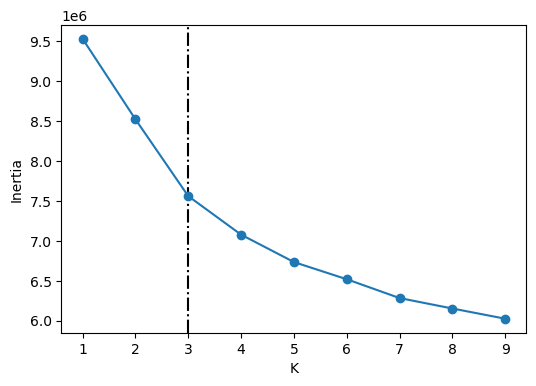

In [9]:
def plot_elbow(w, h, inertia_values):
    plt.figure(figsize=(w, h))
    plt.axvline(x=3, linestyle="-.", c="black")
    plt.plot(range(1, 10), inertia_values, "-o")
    ax = plt.gca()
    ax.tick_params("both", labelsize=(w + h))
    ax.set_xlabel("K", fontsize=w+h)
    ax.set_ylabel("Inertia", fontsize=w+h)

inertia_values = list()
for k in range(1, 10):
    inertia_values.append(KMeans(n_clusters=k, n_init='auto').fit(transformed_df).inertia_)
plot_elbow(6, 4, inertia_values)

In [29]:
k = 3
km = KMeans(n_clusters=k, n_init='auto', random_state=42)
km.fit(transformed_df)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [30]:
cluster_labels = km.labels_
counts = np.bincount(cluster_labels)
total_count = len(cluster_labels)
percentages = (counts / total_count) * 100

for number, percentage in enumerate(percentages, start=1):
    print("{}: {:.2f}%".format(number, percentage))

1: 60.65%
2: 2.01%
3: 37.34%


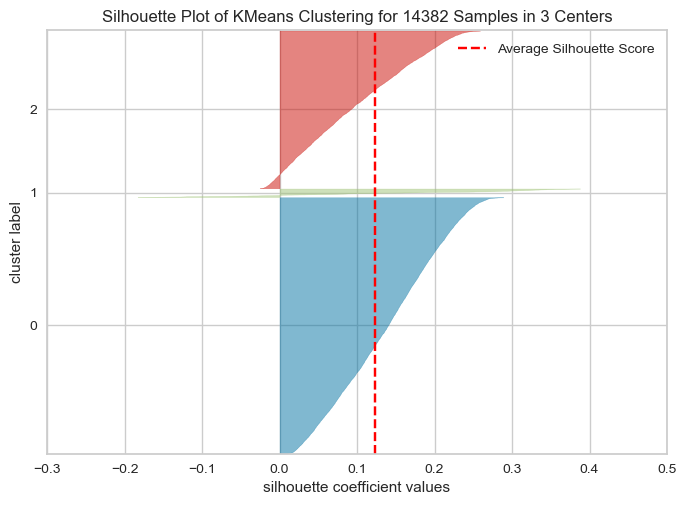

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(k, n_init='auto', random_state=42)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
visualizer.fit(transformed_df)
visualizer.show();

## DBSCAN

In [13]:
from sklearn.cluster import DBSCAN

## PCA

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)

reduced_data = pca.fit_transform(transformed_df)

print("Explained variance ratio:", sum(pca.explained_variance_ratio_))

Explained variance ratio: 0.8436555636781667


In [37]:
for eps in range(10, 30):
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(reduced_data)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=10
Number of clusters: 132
Cluster sizes: [8200 4959   80   18   18   12   15    7    8    7    9   48   13   13
   12   10   13    6   14   11   21   59    5   26   10   14    5    4
    9    5    5   10    9   13   18    7   10    4    7    5    8   24
    7    6    9   33    8    8   11    7    5    7    5    8    9    7
    9    7    8    5    7   13   18   15   11    4   13    9   14    9
    7    5    8    5    8    5   12    6    5    7    7    5    8   10
   13    5    5    4    8    5    6    7    8    6    9    6    4    6
    5    3    8    5    5    7    5    6    5    5    4    5    5    4
    5    5    5    5    4    7    5    5    6    5    5    5    5    4
    3    4    4    4    5    6]

eps=11
Number of clusters: 74
Cluster sizes: [5383 8352   11    9    9    6    8   38    5    5    6    9    8   65
    9    5   10   20    4   18    7    8    8    7    6    6    9    5
   11    6   24    7    9    5    5    5    7    5    8   18    5    3
   33    5   15    5   

## hdbscan

In [35]:
import hdbscan

min_cluster_size_values = [5, 10, 15]
min_samples_values = [1, 2, 3]

for min_cluster_size in min_cluster_size_values:
    for min_samples in min_samples_values:
        print("min_cluster_size={}, min_samples={}".format(min_cluster_size, min_samples))
        
        hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, 
                                            min_samples=min_samples)
        
        labels = hdbscan_clusterer.fit_predict(reduced_data)
        
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        cluster_sizes = [list(labels).count(i) for i in range(num_clusters)]
        print("Number of clusters:", num_clusters)
        print("Cluster sizes:", cluster_sizes)
        print()

min_cluster_size=5, min_samples=1
Number of clusters: 6
Cluster sizes: [8, 8, 6, 7, 6, 14226]

min_cluster_size=5, min_samples=2
Number of clusters: 3
Cluster sizes: [35, 6, 14180]

min_cluster_size=5, min_samples=3
Number of clusters: 2
Cluster sizes: [35, 14226]

min_cluster_size=10, min_samples=1
Number of clusters: 2
Cluster sizes: [35, 14270]

min_cluster_size=10, min_samples=2
Number of clusters: 2
Cluster sizes: [35, 14251]

min_cluster_size=10, min_samples=3
Number of clusters: 5
Cluster sizes: [35, 10, 13789, 11, 18]

min_cluster_size=15, min_samples=1
Number of clusters: 2
Cluster sizes: [35, 14270]

min_cluster_size=15, min_samples=2
Number of clusters: 2
Cluster sizes: [35, 14251]

min_cluster_size=15, min_samples=3
Number of clusters: 2
Cluster sizes: [35, 14226]

